# Understand CNN with MNIST

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

## Load MNIST data

In [2]:
# load famous mnist dataset which is already integrated in library keras
mnist = keras.datasets.mnist

split data in train and test dataset
x_train and x_test contains the arrays of 28x28 grayscaled images (already preprocessed data) -> images transformed to numerical values
whereas y_train and y_test contain the labels that we want to predict

In [3]:
(train_features, train_labels),(test_features, test_labels) = mnist.load_data()

# normalization of array x_train and x_test
train_features, test_features = train_features / 255.0, test_features / 255.0

In [4]:
# test on shape of x_train and y_train
print(train_features.shape)
print(train_labels.shape)


#and for x_test and y_test
print(test_features.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Build a CNN model

#### 1. Before you can train the model train and test features have to be reshaped

In [7]:
train_features = train_features.reshape(60000, 28,28,1)
test_features = test_features.reshape(10000, 28,28,1)

print(train_features.shape)
print(test_features.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


#### 2. Setup a sequential model

A convolutional neural network starts with a convulutional layer followed by another conv or a pooling layer.
The convolutional layer has the purpose to identify significant features within the image like edges and curves. 
The pooling layer on the other handside has the aim to reduce complexity by getting rid of non-significant features (pixels) within the image. 

Configuration Conv Layer:
- filters: number of filters that should be applied to the image
- kernel size: the size of each filter
- strides: the step size of a filter mover over an image
- padding: will be normale "same" which means the output dimension of this layer should have the same as the input

Configuration Pooling Layer:
- pool size: The size you want to reduce the dimension of the image (e.g. 28x28 -> 14x14 after pooling)

In [8]:
model = keras.Sequential([
        keras.layers.Conv2D(filters = 32, kernel_size = 3, strides=(1, 1), padding='same', input_shape=(28, 28,1), activation = 'relu'),
        keras.layers.MaxPooling2D(pool_size = 2), # for reducing dimensions
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10, activation='softmax') 
])

model.compile(optimizer='adam',
                  lr = 0.1, 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'],
                  use_multiprocessing = True)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 804,554
Trainable params: 804,554
Non-trainable params: 0
_________________________________________________________________


#### 3. Start model training

In [10]:
cnn = model.fit(train_features, 
                train_labels, 
                epochs=5,
                batch_size = 32,
                validation_data = (test_features, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 23s 391us/sample - loss: 0.1706 - accuracy: 0.9479 - val_loss: 0.0608 - val_accuracy: 0.9797
Epoch 2/5
60000/60000 [==============================] - 23s 378us/sample - loss: 0.0570 - accuracy: 0.9828 - val_loss: 0.0464 - val_accuracy: 0.9846
Epoch 3/5
60000/60000 [==============================] - 30s 500us/sample - loss: 0.0371 - accuracy: 0.9887 - val_loss: 0.0557 - val_accuracy: 0.9820
Epoch 4/5
60000/60000 [==============================] - 33s 555us/sample - loss: 0.0256 - accuracy: 0.9920 - val_loss: 0.0387 - val_accuracy: 0.9865
Epoch 5/5
60000/60000 [==============================] - 36s 607us/sample - loss: 0.0176 - accuracy: 0.9943 - val_loss: 0.0436 - val_accuracy: 0.9858


#### 4. Evaluate the model

In [11]:
test_loss, test_acc = model.evaluate(test_features,  test_labels, verbose=2)

print('\nTest loss:', test_loss)
print('\nTest accuracy:', test_acc)

acc = cnn.history['accuracy'] 
val_acc = cnn.history['val_accuracy']
epochs = range(len(acc))

10000/1 - 1s - loss: 0.0219 - accuracy: 0.9858

Test loss: 0.043558212674711834

Test accuracy: 0.9858


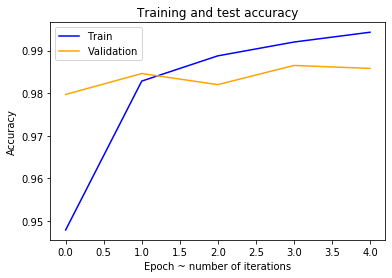

In [12]:
# get statistics from model history
acc = cnn.history['accuracy'] 
val_acc = cnn.history['val_accuracy']
epochs = range(len(acc))

# plot accuracy vs epoch
plt.title('Training and test accuracy')
plt.plot(epochs, acc, color = 'blue', label = 'Train')
plt.plot(epochs, val_acc, color = 'orange', label = 'Validation')
plt.xlabel('Epoch ~ number of iterations')
plt.ylabel('Accuracy')

plt.legend()

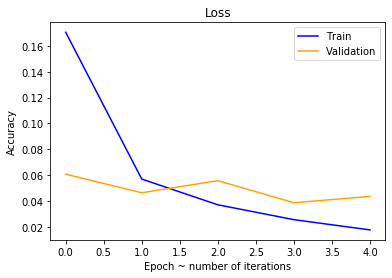

In [13]:
# get statistics from model history
loss = cnn.history['loss'] 
val_loss = cnn.history['val_loss']
epochs = range(len(acc))

# plot accuracy vs epoch
plt.title('Loss')
plt.plot(epochs, loss, color = 'blue', label = 'Train')
plt.plot(epochs, val_loss, color = 'orange', label = 'Validation')
plt.xlabel('Epoch ~ number of iterations')
plt.ylabel('Accuracy')
plt.legend()

In [14]:
predictions = model.predict(test_features)

Compute the average prediction accuracy for the test set

In [15]:
result_list = []
for n in range(len(predictions)):
    r = round(100 * np.max(predictions[n]),2)
    result_list.append(r)
    
avg = round(sum(result_list) / len(result_list), 2)
print(avg)

98.93
